I. EDA


1. import library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from dataprep import load_datasets

2. Load data

In [4]:
train_df , test_df , val_df = load_datasets()
print(train_df.head())
print(test_df.head())
print(val_df.head())

                                                text    label
0                      tôi không cảm thấy bị sỉ nhục  sadness
1  tôi có thể đi từ cảm giác vô vọng đến vô cùng ...  sadness
2  tôi đang tranh thủ một phút để đăng bài, tôi c...    anger
3  tôi luôn cảm thấy hoài niệm về lò sưởi tôi sẽ ...     love
4                         tôi đang cảm thấy cáu kỉnh    anger
                                                text    label
0  tôi đang cảm thấy khá chán nản nên hiện tại tô...  sadness
1  tôi đang cập nhật blog của mình vì tôi cảm thấ...  sadness
2  tôi không bao giờ để cô ấy tách khỏi tôi bởi v...  sadness
3  tôi rời đi với bó hoa tulip đỏ và vàng dưới cá...      joy
4        tôi đã cảm thấy hơi vô ích khi làm điều này  sadness
                                                text    label
0  tôi cảm thấy khá buồn và tiếc cho bản thân như...  sadness
1  tôi có cảm giác như tôi vẫn đang nhìn vào một ...  sadness
2    tôi cảm thấy mình như một người hầu trung thành     love
3       

3. Check shape and duplicate

In [5]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(16000, 2)
(2000, 2)
(2000, 2)


In [6]:
train_df.duplicated().sum()
test_df.duplicated().sum()
val_df.duplicated().sum()

0

4. Draw distribution of categories on each data

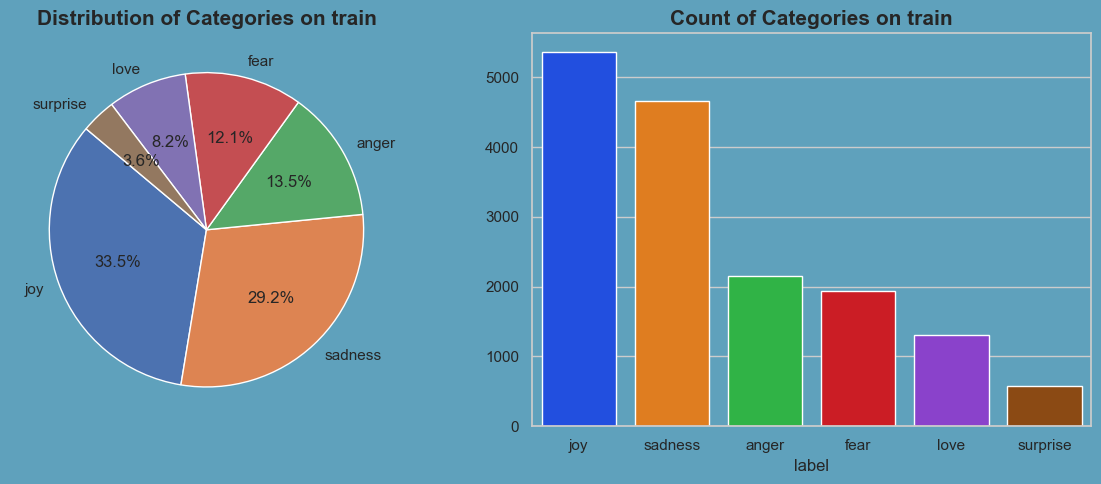

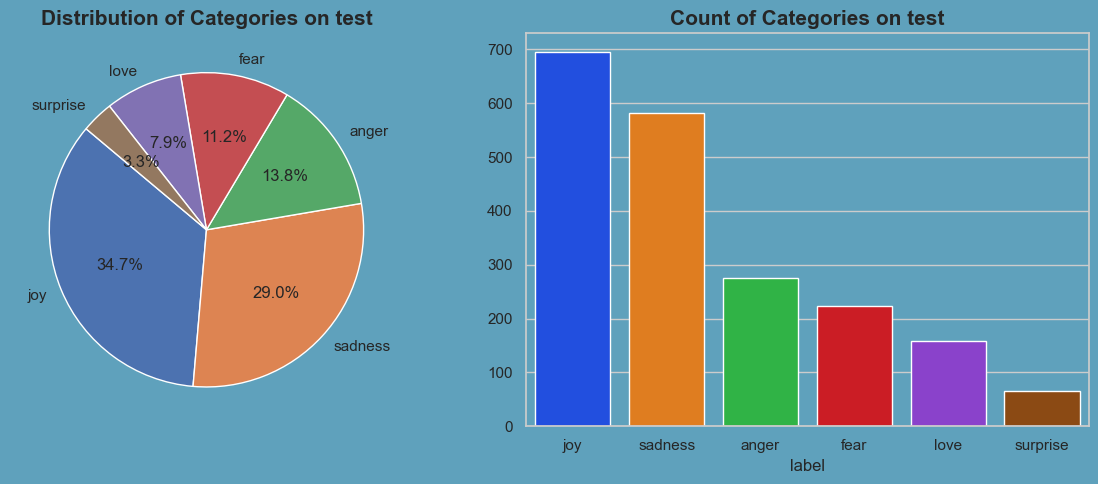

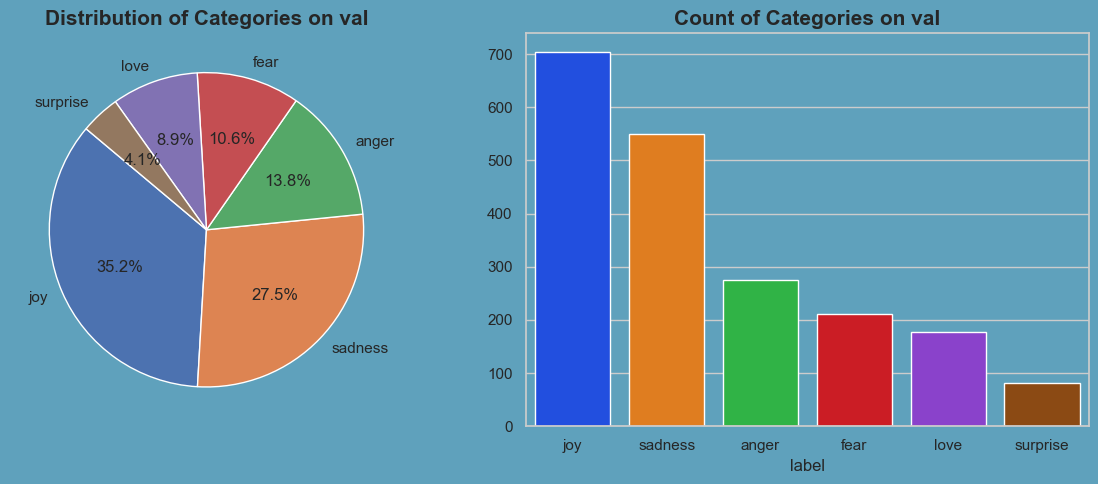

In [7]:

count = train_df['label'].value_counts()
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})
fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor=background_color)
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories on train', fontsize=15, fontweight='bold')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories on train', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
count = test_df['label'].value_counts()
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})
fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor=background_color)
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories on test', fontsize=15, fontweight='bold')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories on test', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
count = val_df['label'].value_counts()
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})
fig, axs = plt.subplots(1, 2, figsize=(12,5), facecolor=background_color)
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories on val', fontsize=15, fontweight='bold')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories on val', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

- We can see that the category distribution of each data set is quite similar

5. Distribution of textlength

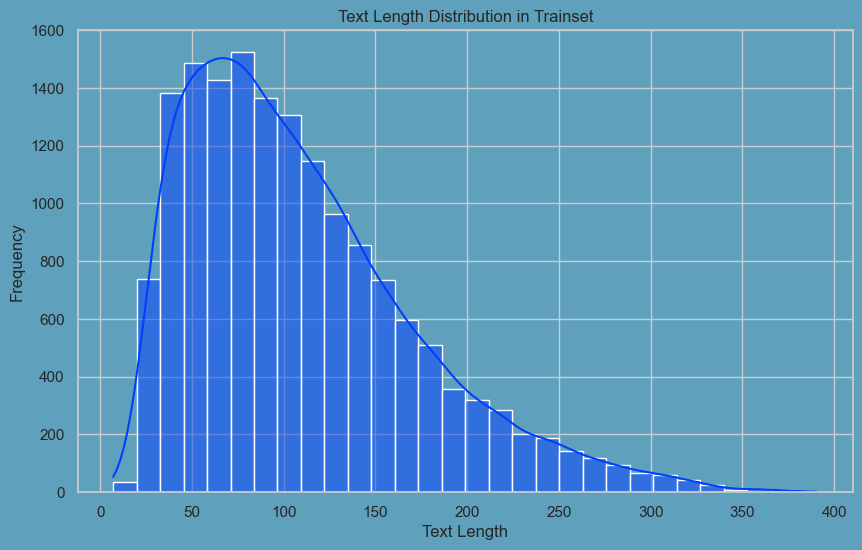

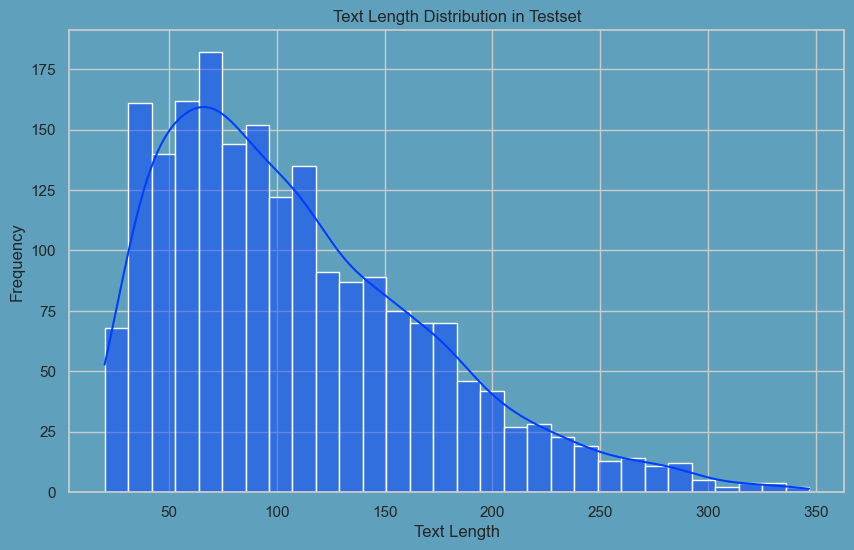

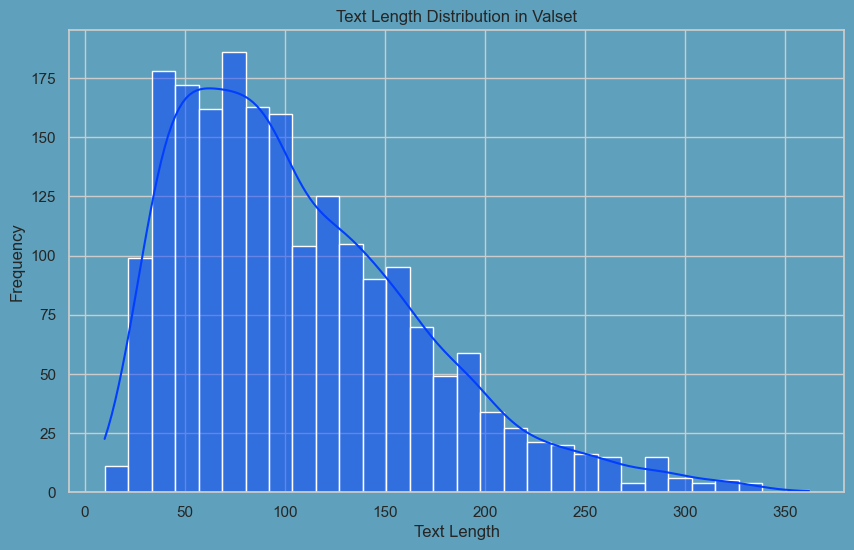

In [8]:
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in Trainset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
test_df['text_length'] = test_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in Testset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
val_df['text_length'] = val_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(val_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in Valset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

6. Most common words 

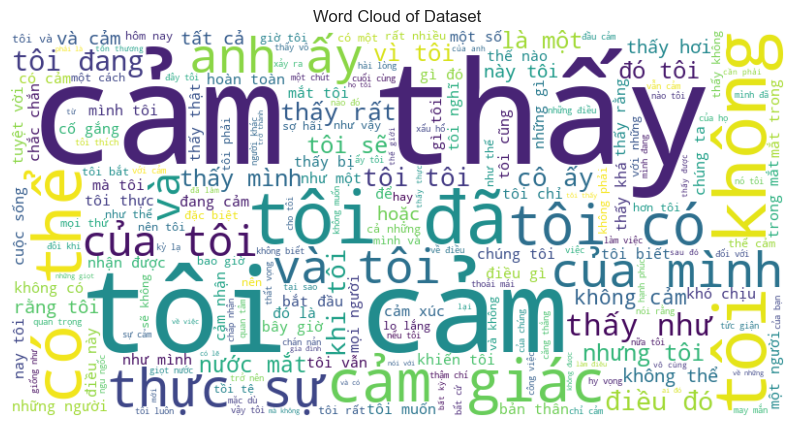

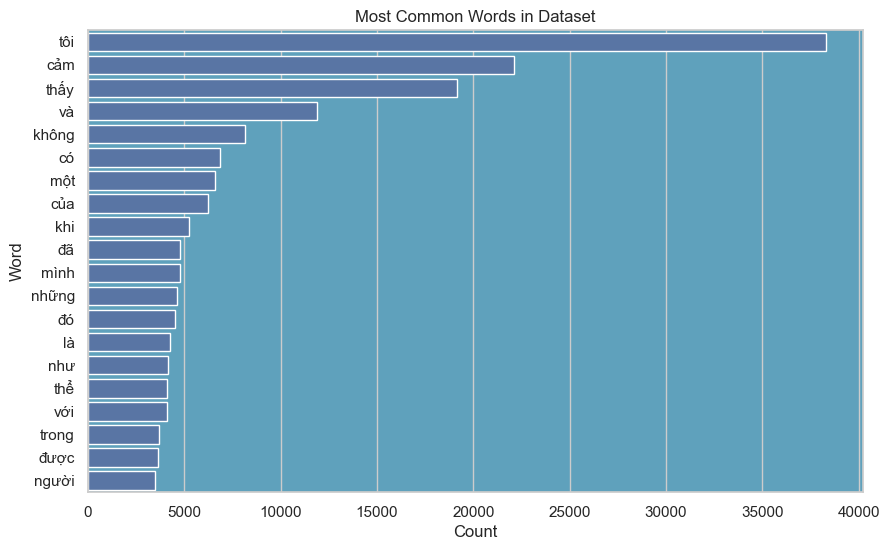

In [13]:
from collections import Counter
from  wordcloud import WordCloud
df = pd.concat([train_df, test_df, val_df])
all_text = ' '.join(df['text'])

wordcloud =WordCloud(width = 800, height = 400 , background_color= 'white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Dataset')
plt.axis('off')
plt.show()
word_counts = Counter(all_text.split())
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Most Common Words in Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

- We can see the most frequently occurring words in the entire data set

7.  Top 20 words associated with each label

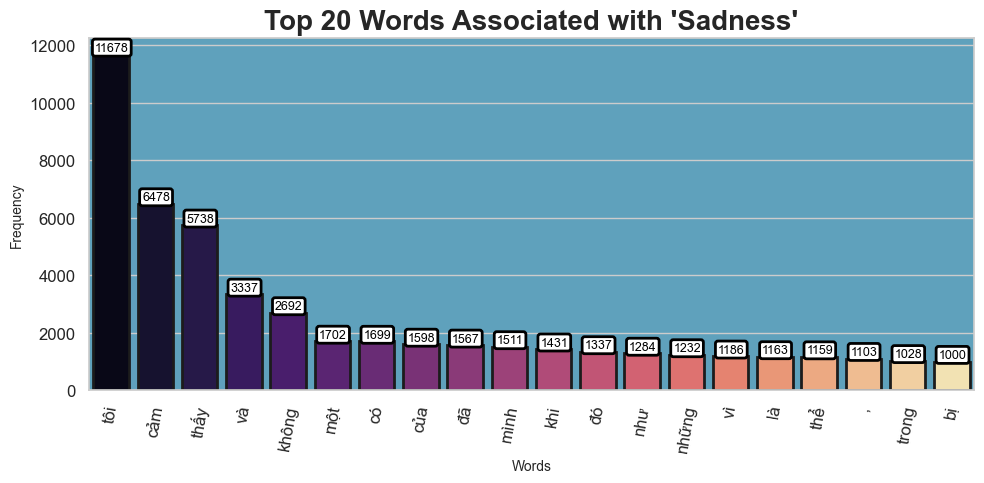

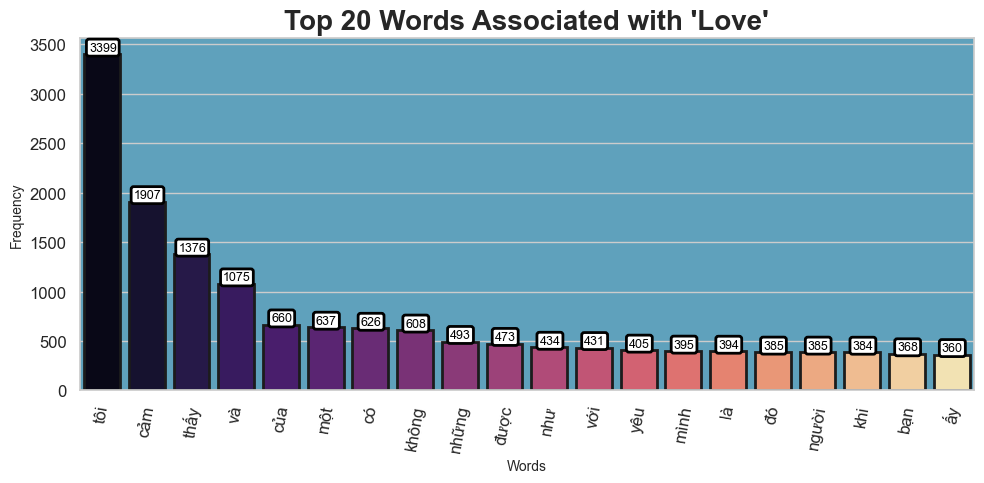

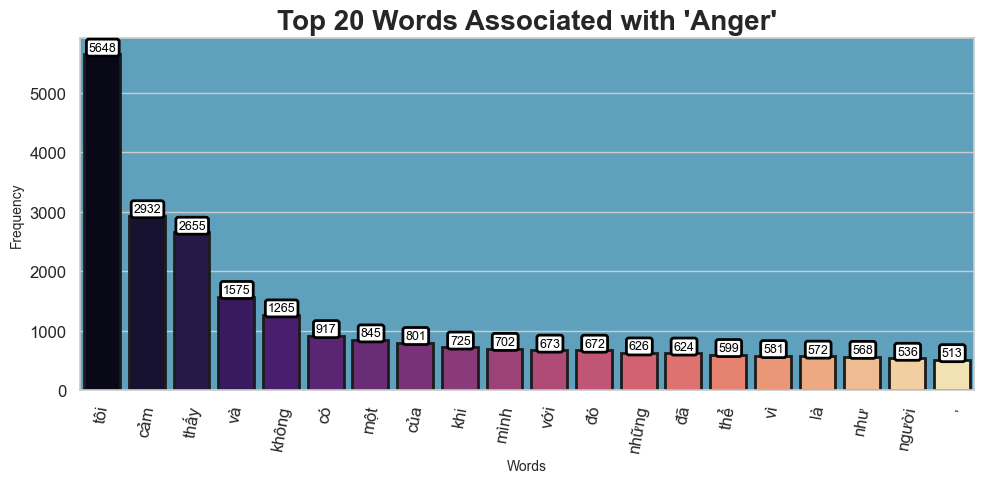

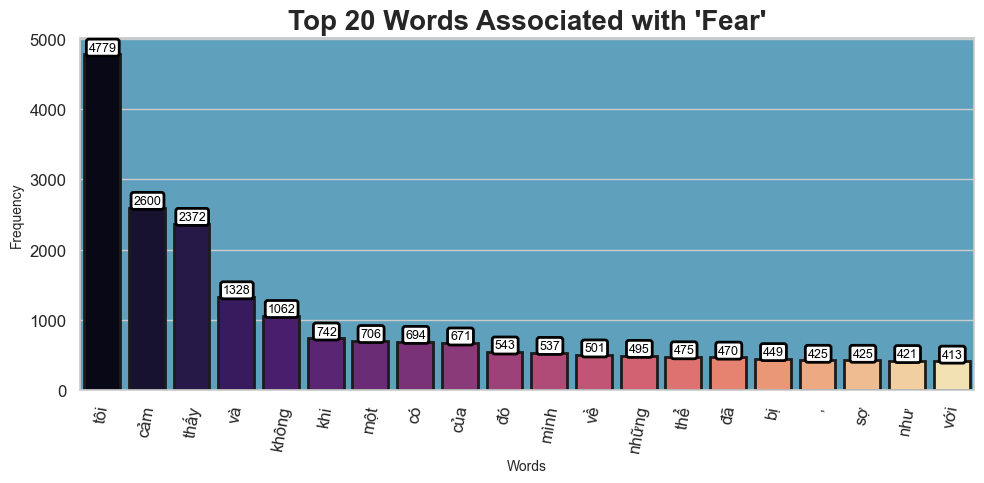

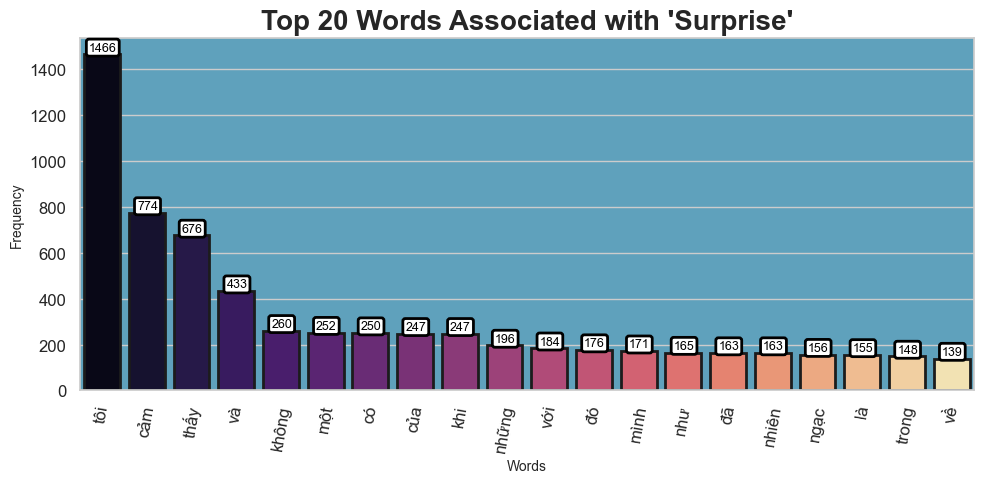

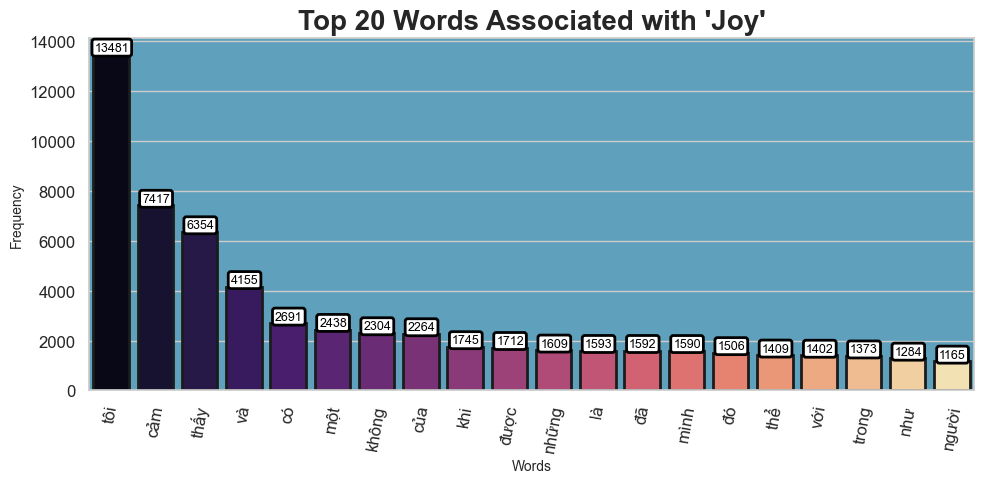

In [12]:
from nltk.tokenize import word_tokenize

love_texts = df[df['label'] == 'sadness']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Sadness'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
#-------------------------------------------------------------------------------------------#
love_texts = df[df['label'] == 'love']['text']
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)
top_20_words = dict(word_freq.most_common(20))
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Love'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
#-----------------------------------------------------------------------------------------------------------#
love_texts = df[df['label'] == 'anger']['text']
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)
top_20_words = dict(word_freq.most_common(20))
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Anger'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
#---------------------------------------------------------------------------------------------------------#
love_texts = df[df['label'] == 'fear']['text']
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)
top_20_words = dict(word_freq.most_common(20))
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Fear'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
#-------------------------------------------------------------------------------------------------------------#
love_texts = df[df['label'] == 'surprise']['text']
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)
top_20_words = dict(word_freq.most_common(20))
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Surprise'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
#---------------------------------------------------------------------------------------------------------------#
love_texts = df[df['label'] == 'joy']['text']
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)
top_20_words = dict(word_freq.most_common(20))
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Joy'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

-We can see the words that appear the most for each label. Words that appear a lot in all labels should be removed before training to improve model performance. These words can be considered as stopwords